In [1]:
import numpy as np
import scipy
import scipy.io
import scipy.sparse as sp
import csv

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from datafile_methods.data_processing import load_data
PREDICTION_PATH = '../data/predictions/'

In [3]:
models = ['baseline', 'co_clustering', 'knn_baseline_i',
          'knn_baseline_u', 'mf_als_recommend',
          'mf_als', 'mf_svd_sci', 'mf_svd_skl', 'nmf',
          'slope_one', 'sur_svd']

n_models = len(models)

fn_te = [load_data('{}model_{}_te.csv'.format(PREDICTION_PATH, e))
         for e in models]

fn_val = [load_data('{}model_{}_val.csv'.format(PREDICTION_PATH, e))
         for e in models]

fn_sub = [load_data('{}model_{}_sub.csv'.format(PREDICTION_PATH, e))
         for e in models]

#### Compare submission files

In [4]:
nonzero = fn_sub[0].count_nonzero()

diff_mean = np.zeros((n_models, n_models))
diff_max = np.zeros((n_models, n_models))
diff_min = np.zeros((n_models, n_models))

for i in range(n_models):
    for j in range(n_models):
        diff_mean[i,j] = abs(fn_sub[i] - fn_sub[j]).sum() / nonzero
        diff_max[i,j] = abs(fn_sub[i] - fn_sub[j]).max()
        diff_min[i,j] = abs(fn_sub[i] - fn_sub[j]).min()

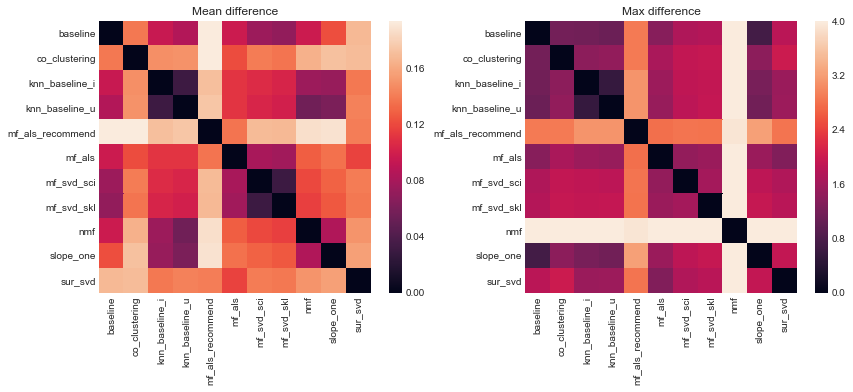

In [5]:
plt.figure(figsize=(14,5))
plt.subplot(121)
sns.heatmap(diff_mean, square=True, xticklabels=models, yticklabels=models)
plt.title('Mean difference')
plt.subplot(122)
sns.heatmap(diff_max, square=True, xticklabels=models, yticklabels=models)
plt.title('Max difference')
plt.show()